# Denoising and Detoning

In [1]:
import sys


In [2]:
sys.path.append('../')

In [3]:
import matplotlib.pyplot as plt 

In [4]:
from ml4am.denoising import *

## The Marcenko-Pastur Theorem 

In [5]:
x=np.random.normal(size=(10000,1000)) 

In [6]:
matrix = np.corrcoef(x,rowvar=0)

In [7]:
type(matrix)

numpy.ndarray

In [8]:
help(np.linalg.eigh)

Help on function eigh in module numpy.linalg:

eigh(a, UPLO='L')
    Return the eigenvalues and eigenvectors of a complex Hermitian
    (conjugate symmetric) or a real symmetric matrix.
    
    Returns two objects, a 1-D array containing the eigenvalues of `a`, and
    a 2-D square array or matrix (depending on the input type) of the
    corresponding eigenvectors (in columns).
    
    Parameters
    ----------
    a : (..., M, M) array
        Hermitian or real symmetric matrices whose eigenvalues and
        eigenvectors are to be computed.
    UPLO : {'L', 'U'}, optional
        Specifies whether the calculation is done with the lower triangular
        part of `a` ('L', default) or the upper triangular part ('U').
        Irrespective of this value only the real parts of the diagonal will
        be considered in the computation to preserve the notion of a Hermitian
        matrix. It therefore follows that the imaginary part of the diagonal
        will always be treated as zero

In [9]:

eVal0,eVec0=getPCA(matrix) 
pdf0=mpPDF(1.,q=x.shape[0]/float(x.shape[1]),pts=1000) 
pdf1=fitKDE(np.diag(eVal0),bWidth=.01) # empirical pdf

In [10]:
eVal0.shape

(1000, 1000)

In [11]:
eVec0.shape

(1000, 1000)

In [12]:
type(pdf0)

pandas.core.series.Series

In [13]:
pdf0

0.467544    0.000000
0.468811    0.135795
0.470077    0.191429
0.471343    0.233705
0.472609    0.269001
              ...   
1.727391    0.073598
1.728657    0.063723
1.729923    0.052018
1.731189    0.036774
1.732456    0.000000
Length: 1000, dtype: float64

In [14]:
pdf0.index

Float64Index([0.46754446796632404,  0.4688106452076327, 0.47007682244894133,
                 0.47134299969025,  0.4726091769315587, 0.47387535417286736,
                0.475141531414176, 0.47640770865548465,  0.4776738858967933,
                0.478940063138102,
              ...
               1.7210599368618982,  1.7223261141032067,  1.7235922913445154,
               1.7248584685858241,  1.7261246458271327,  1.7273908230684414,
               1.7286570003097501,  1.7299231775510586,  1.7311893547923674,
                1.732455532033676],
             dtype='float64', length=1000)

Text(0.5, 1.0, 'A visualization of the Marcenko-Patur Theorem')

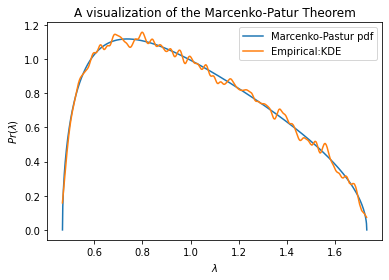

In [15]:
_=plt.plot(pdf0.index, pdf0 ,'-', label="Marcenko-Pastur pdf")
_=plt.plot(pdf1.index, pdf1 ,'-', label="Empirical:KDE")
plt.legend(loc="upper right")
plt.xlabel(r'$\lambda$')    
plt.ylabel(r'$Pr(\lambda)$')  
plt.title('A visualization of the Marcenko-Patur Theorem')

## Random Matrix with Signal

In [16]:
alpha,nCols,nFact,q=.995,1000,100,10 
cov=np.cov(np.random.normal(size=(nCols*q,nCols)),rowvar=0) 
cov=alpha*cov+(1-alpha)*getRndCov(nCols,nFact) # noise+signal 
corr0=cov2corr(cov)
eVal01,eVec01=getPCA(corr0)

In [17]:
pdf0=mpPDF(1.,q=x.shape[0]/float(x.shape[1]),pts=1000) 
pdf1=fitKDE(np.diag(eVal01),bWidth=.01) # empirical pdf

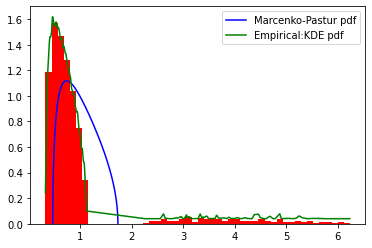

In [18]:
fig = plt.figure()
ax  = fig.add_subplot(111)
_=ax.hist(np.diag(eVal01), color='r',density = True, bins=50) # Histogram the eigenvalues
plt.plot(pdf0.index, pdf0, color='b', label="Marcenko-Pastur pdf")
plt.plot(pdf1.index, pdf1, color='g', label="Empirical:KDE pdf")

#plt.plot(pdf1.keys(), pdf1, color='g', label="Empirical:KDE")
#plt.plot(x_range, pdf2, color='b', label="Eigenvalues of random-matrix with signal")
plt.legend(loc="upper right")
plt.show()   

## Fitting the Marcenko-Pastur Distribution 

In [19]:
q

10

In [20]:
eMax0,var0=findMaxEval(np.diag(eVal01),q,bWidth=.01) 


found errPDFs0.6783092813202036


In [21]:
var0

0.6783092813202036

In [22]:
nFacts0=eVal01.shape[0]-np.diag(eVal01)[::-1].searchsorted(eMax0)

In [23]:
nFacts0

100

In [24]:
fitted_mp_pdf0=mpPDF(var0,q ,pts=1000) 


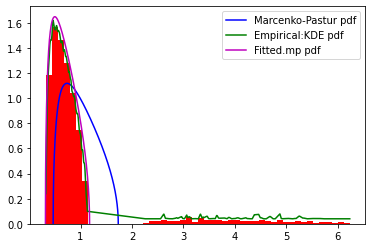

In [25]:
fig = plt.figure()
ax  = fig.add_subplot(111)
_=ax.hist(np.diag(eVal01), color='r',density = True, bins=50) # Histogram the eigenvalues
plt.plot(pdf0.index, pdf0, color='b', label="Marcenko-Pastur pdf")
plt.plot(pdf1.index, pdf1, color='g', label="Empirical:KDE pdf")
plt.plot(fitted_mp_pdf0.index, fitted_mp_pdf0, color='m', label="Fitted.mp pdf")

#plt.plot(pdf1.keys(), pdf1, color='g', label="Empirical:KDE")
#plt.plot(x_range, pdf2, color='b', label="Eigenvalues of random-matrix with signal")
plt.legend(loc="upper right")
plt.show()   

## Hyperparameter Fine tuning of M-P distribution

In [26]:
best_width = findOptimalBWidth(np.diag(eVal01))

In [27]:
best_width

{'bandwidth': 0.05722367659350217}

## Denoising 

In [28]:
corr1=denoisedCorr(eVal0,eVec0,nFacts0) 


In [29]:
corr1

array([[ 1.00000000e+00,  9.69822458e-04,  3.33311315e-03, ...,
         1.55264421e-02, -8.00939661e-03,  7.70084827e-03],
       [ 9.69822458e-04,  1.00000000e+00,  2.03581809e-03, ...,
        -1.81556942e-02,  9.12035464e-03, -4.66679883e-03],
       [ 3.33311315e-03,  2.03581809e-03,  1.00000000e+00, ...,
        -3.18282829e-03,  1.76511972e-03,  6.86559385e-03],
       ...,
       [ 1.55264421e-02, -1.81556942e-02, -3.18282829e-03, ...,
         1.00000000e+00, -2.99629899e-03,  1.30937047e-02],
       [-8.00939661e-03,  9.12035464e-03,  1.76511972e-03, ...,
        -2.99629899e-03,  1.00000000e+00,  3.97145552e-03],
       [ 7.70084827e-03, -4.66679883e-03,  6.86559385e-03, ...,
         1.30937047e-02,  3.97145552e-03,  1.00000000e+00]])

In [30]:
eVal1,eVec1=getPCA(corr1)

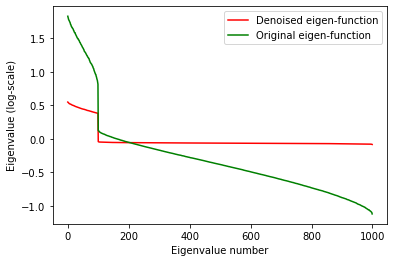

In [31]:
denoised_eigenvalue = np.diag(eVal1)
eigenvalue_prior = np.diag(eVal01)
plt.plot(range(0, len(denoised_eigenvalue)), np.log(denoised_eigenvalue), color='r', label="Denoised eigen-function")
plt.plot(range(0, len(eigenvalue_prior)), np.log(eigenvalue_prior), color='g', label="Original eigen-function")
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue (log-scale)")
plt.legend(loc="upper right")
plt.show()

In [32]:
corr1 = denoisedCorr2(eVal01, eVec01, nFacts0, alpha=0.5)   
eVal1, eVec1 = getPCA(corr1)

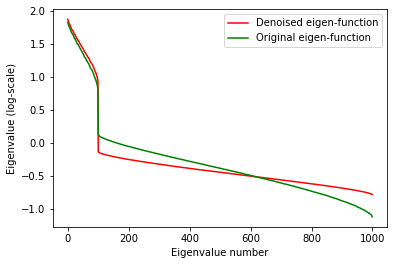

In [33]:
denoised_eigenvalue = np.diag(eVal1)
eigenvalue_prior = np.diag(eVal01)
plt.plot(range(0, len(denoised_eigenvalue)), np.log(denoised_eigenvalue), color='r', label="Denoised eigen-function")
plt.plot(range(0, len(eigenvalue_prior)), np.log(eigenvalue_prior), color='g', label="Original eigen-function")
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue (log-scale)")
plt.legend(loc="upper right")
plt.show()

## Detoning 

In [34]:
corr_detoned_denoised = detoned_corr(corr1, eVal1, eVec1)

eVal1_detoned, eVec1_detoned = getPCA(corr_detoned_denoised)
detoned_denoised_eigenvalue = np.diag(eVal1_detoned)
denoised_eigenvalue = np.diag(eVal1)
eigenvalue_prior = np.diag(eVal01)

/var/folders/lm/4shz7d3x35q2c4bp8kddjc640000gn/T/ipykernel_66297/1637608292.py:1: RuntimeWarning: invalid value encountered in log
  plt.plot(range(0, len(detoned_denoised_eigenvalue)), np.log(detoned_denoised_eigenvalue), color='b', label="Detoned, denoised eigen-function")


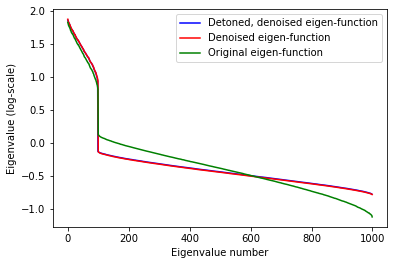

In [35]:


plt.plot(range(0, len(detoned_denoised_eigenvalue)), np.log(detoned_denoised_eigenvalue), color='b', label="Detoned, denoised eigen-function")
plt.plot(range(0, len(denoised_eigenvalue)), np.log(denoised_eigenvalue), color='r', label="Denoised eigen-function")
plt.plot(range(0, len(eigenvalue_prior)), np.log(eigenvalue_prior), color='g', label="Original eigen-function")
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue (log-scale)")
plt.legend(loc="upper right")
plt.show()

## Monte Carlo Experiment

In [36]:
nBlocks, bSize, bCorr = 2, 2, .5
np.random.seed(0)
mu0, cov0 = formTrueMatrix(nBlocks, bSize, bCorr)

In [37]:
# code snippet 2.10
nObs, nTrials, bWidth, shrink, minVarPortf = 5, 5, .01, False, True
w1 = pd.DataFrame(columns = range(cov0.shape[0]), index = range(nTrials), dtype=float)

w1_d = w1.copy(deep=True)
np.random.seed(0)

In [38]:
for i in range(nTrials):
    mu1, cov1 = simCovMu(mu0, cov0, nObs, shrink = shrink)
    if minVarPortf: mu1 = None
    cov1_d = deNoiseCov(cov1, nObs*1./cov1.shape[1], bWidth)
    w1.loc[i] = optPort(cov1, mu1).flatten() # add column vector w as row in w1
    w1_d.loc[i] = optPort(cov1_d, mu1).flatten() # np.sum(w1_d, axis=1) is vector of 1's. sum(np.sum(w1_d, axis=0)= nTrials
    # so minimum-variance-portfolio is 1./nTrials*(np.sum(w1_d, axis=0)) - but distribution not stationary


found errPDFs0.99999
found errPDFs0.49691002139766355
found errPDFs0.99999
found errPDFs0.99999
found errPDFs0.99999


In [39]:




min_var_port = 1./nTrials*(np.sum(w1_d, axis=0)) 
#code snippet 2.11
w0 = optPort(cov0, None if minVarPortf else mu0) # w0 true percentage asset allocation
w0 = np.repeat(w0.T, w1.shape[0], axis=0) 
rmsd = np.mean((w1-w0).values.flatten()**2)**.5     #RMSE not denoised
rmsd_d = np.mean((w1_d-w0).values.flatten()**2)**.5 #RMSE denoised
print("RMSE not denoised:"+str( rmsd))
print("RMSE denoised:"+str( rmsd_d))

RMSE not denoised:1.2511752878050761
RMSE denoised:0.5051529232275288
